In [11]:
from pythtb import * # import TB model class
import matplotlib.pyplot as plt
from pythtb import * # import TB model class
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))
#mpld3.enable_notebook()
def plot_bands(my_model,ax=None):
    ax = ax or plt.gca()
    path=[[0.0,0.0],[0.0,0.5],[0.5,0.5],[0.0,0.0]]
    label=(r'$\Gamma $',r'$X$', r'$M$', r'$\Gamma $')
    (k_vec,k_dist,k_node)=my_model.k_path(path,301,0)
    # solve model
    evals=my_model.solve_all(k_vec)
    # plot band structure
    # specify horizontal axis details
    ax.set_xlim(k_node[0],k_node[-1])
    ax.set_xticks(k_node)
    ax.set_xticklabels(label)
    for n in range(len(k_node)):
        ax.axvline(x=k_node[n], linewidth=0.5, color='k')

    # plot bands
    for n in evals:
        ax.plot(k_dist,n)

    ax.set_title("licoo2 Bulk")
    ax.set_xlabel("Path in k-space")
    ax.set_ylabel("Band energy")

    return ax
def plot_bands_fin(my_model,ax=None):
    (k_vec,k_dist,k_node)=my_model.k_path('full',100,0)
    k_label=[r"$0$",r"$\pi$", r"$2\pi$"]

    # solve model
    evals=my_model.solve_all(k_vec)
    #print(evals)
    ax = ax or plt.gca()
    for i in evals:
        ax.plot(k_dist,i)
    ax.set_title("Surface structure")
    ax.set_xlabel("Path in k-space")
    ax.set_ylabel("Band energy")
    ax.set_xticks(k_node)
    ax.set_xticklabels(k_label)
    ax.set_xlim(k_node[0],k_node[-1])
    for n in range(len(k_node)):
      ax.axvline(x=k_node[n], linewidth=0.5, color='k')
    return ax
    
def plot_dos_finite(my_model,ax=None):
    (k_vec,k_dist,k_node)=my_model.k_path('full',100,0)
    evals_true=my_model.solve_all(k_vec)
    evals_true=evals_true.flatten()
    ax = ax or plt.gca()
    ax.hist(evals_true,400,range=(-2,2.))
    #ax.set_ylim(0.0,80.0)
    ax.set_title("surface DOS")
    ax.set_xlabel("Band energy")
    ax.set_ylabel("Number of states")
    ax.set_ylim(-.5,100)
    return ax
    
    
def show(my_model,ax=None):
    ax = ax or plt.gca()
    (fig,ax)=my_model.visualize(0,1)
    ax.set_title("LiCoO2")
    ax.set_xlabel("x coordinate")
    ax.set_ylabel("y coordinate")
    #ax.set_ylim(-1,1)
    return ax
def mymodel(t1=-.5,t2=1,u=0.8,li=.2,co=0):
    lat=[[1.0,0],[0.0,1.0]]
    orb=[[0.0,0],[0.5,0],[0,.5],[.5,.5]]
    t1=t1
    t2=t2
    u=u
    li=li
    co=co
    my_model=tb_model(2,2,lat,orb)
    my_model.set_hop(t1, 0, 1, [0,0])
    my_model.set_hop(t2, 0, 1, [-1,0])
    my_model.set_hop(t1, 2, 3, [0,0])
    my_model.set_hop(t2, 2, 3, [-1,0])


    my_model.set_hop(co, 0, 2, [0,0])
    my_model.set_hop(li, 1, 3, [0,0])
    my_model.set_hop(co, 0, 2, [0,-1])
    my_model.set_hop(li, 1, 3, [0,-1])

    my_model.set_onsite([-u,u,-u,u])
    return my_model
def finite_m(t1=-.5,t2=1,u=0.8,li=.2,co=0):
    lat=[[1.0,0],[0.0,1.0]]
    orb=[[0.0,0],[0.5,0],[0,.5],[.5,.5]]
    t1=t1
    t2=t2
    u=u
    li=li
    co=co
    my_model=tb_model(2,2,lat,orb)
    my_model.set_hop(t1, 0, 1, [0,0])
    my_model.set_hop(t2, 0, 1, [-1,0])
    my_model.set_hop(t1, 2, 3, [0,0])
    my_model.set_hop(t2, 2, 3, [-1,0])


    my_model.set_hop(co, 0, 2, [0,0])
    my_model.set_hop(li, 1, 3, [0,0])
    my_model.set_hop(co, 0, 2, [0,-1])
    my_model.set_hop(li, 1, 3, [0,-1])

    my_model.set_onsite([-u,u,-u,u])
    finite=my_model.cut_piece(10,0,glue_edgs=False)
    return finite

In [16]:


#print("t1=",t1," t2=",t2," t_li=",li," t_Co=",co," U=",u)
#show(my_model)


# gs = gridspec.GridSpec(2, 2)
# fig=plt.figure(figsize=(8,6))
# ax = plt.subplot(gs[0, 0])
# plot_bands(mymodel(),ax)
# ax = plt.subplot(gs[0, 1])
# plot_bands_fin(finite_m(),ax)
# ax = plt.subplot(gs[1, :])
# plot_dos_finite(finite_m(),ax)
# plt.show()

<IPython.core.display.Javascript object>


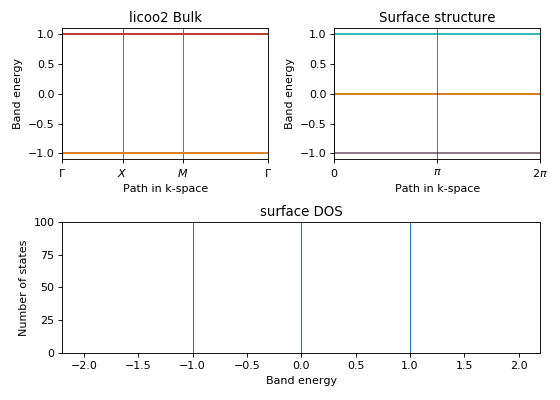

interactive(children=(FloatSlider(value=0.0, description='t1', layout=Layout(height='40px', width='100%'), max…

In [19]:


#%matplotlib notebook
from ipywidgets import *
import numpy as np
gs = gridspec.GridSpec(2, 2)
fig=plt.figure(figsize=(7,5))
b=Layout(width='100%', height='40px')
def update(t1=0,u=0,li=0,co=0):
    fig.clear()
    ax = plt.subplot(gs[0, 0])
    plot_bands(mymodel(t1=t1,u=u,li=li,co=co),ax)
    ax = plt.subplot(gs[0, 1])
    plot_bands_fin(finite_m(t1=t1,u=u,li=li,co=co),ax)
    ax = plt.subplot(gs[1, :])
    plot_dos_finite(finite_m(t1=t1,u=u,li=li,co=co),ax)
    fig.tight_layout()
    #plt.show()
    
interact(update,t1=widgets.FloatSlider(min=-2,max=2,value=0,step=.1,layout=b),
               u=widgets.FloatSlider(min=-1,max=1,value=0,step=.02,layout=b),
                li=widgets.FloatSlider(min=-1,max=1,value=0,step=.02,layout=b),
                 co=widgets.FloatSlider(min=-1,max=1,value=0,step=.02,layout=b)
        
        );